<a href="https://colab.research.google.com/github/ahmedmek1/Supermarket_data_analysis/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Colab Notebooks/


/content/drive/My Drive/Colab Notebooks


In [6]:
data = pd.read_csv('SampleSuperstore.csv')

In [7]:
data.shape

(9994, 13)

In [8]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
data.duplicated().sum()

17

In [11]:
data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
data = data.dropna(axis = 1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [15]:
round((data.isnull().sum() *100)/ data.shape[0])

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [16]:
col=['Postal Code']
data=data.drop(columns=col,axis=1)

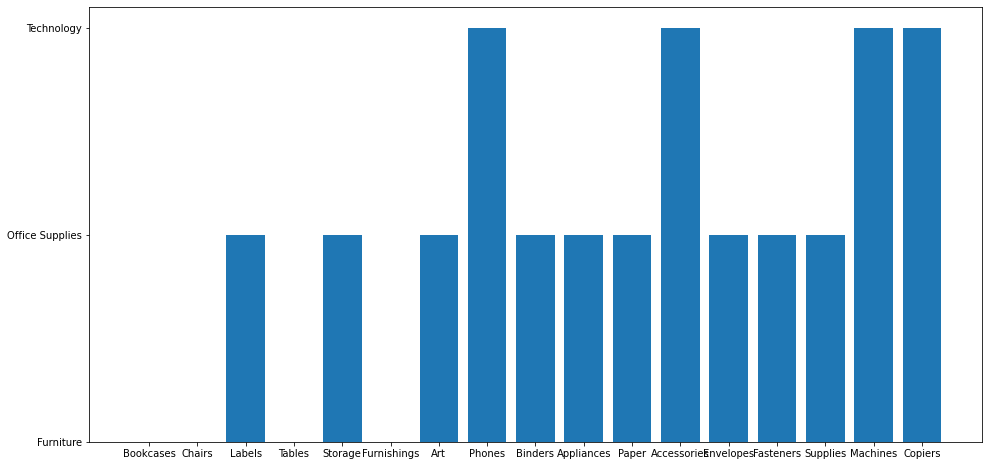

In [17]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=data)
plt.show()

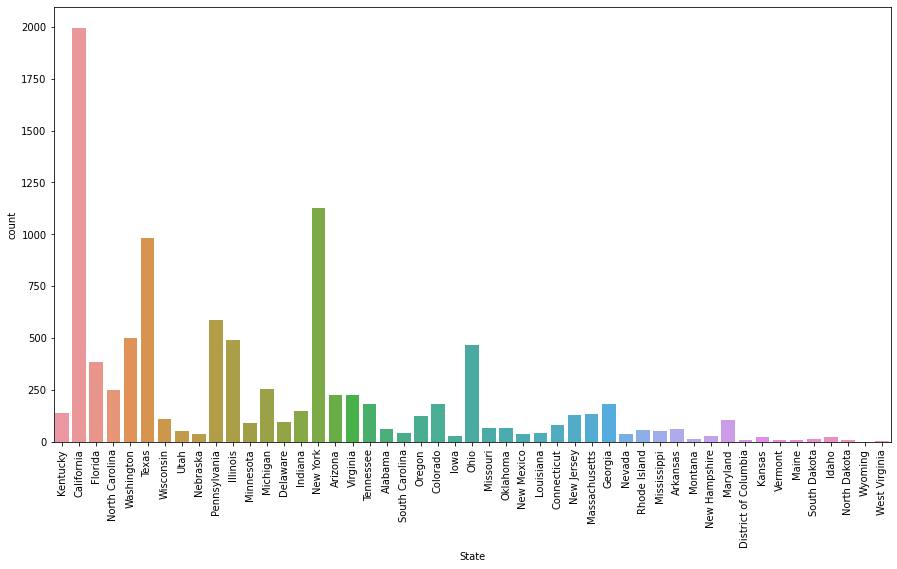

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

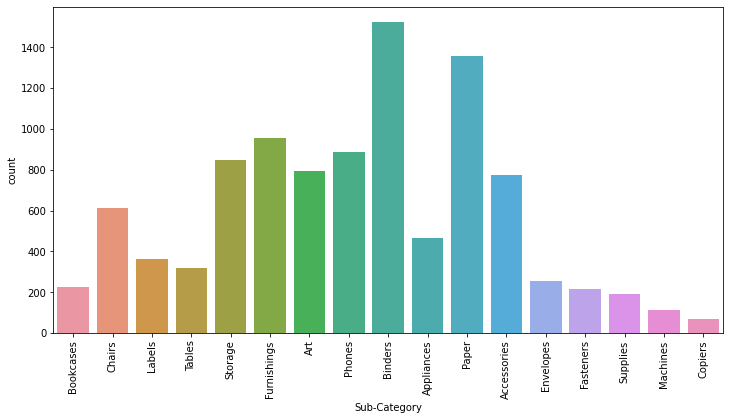

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

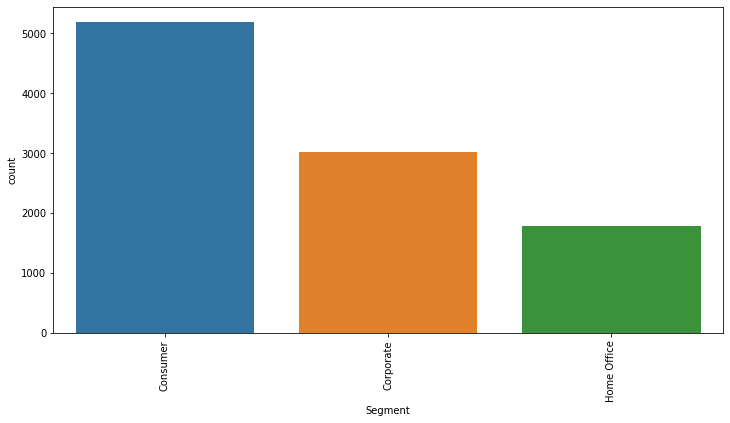

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Segment'])
plt.xticks(rotation=90)
plt.show()

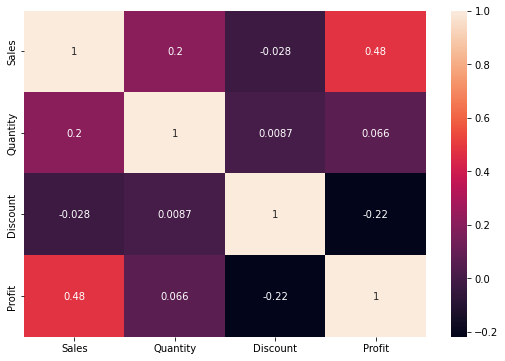

In [21]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(data.corr(), annot= True)
plt.show()

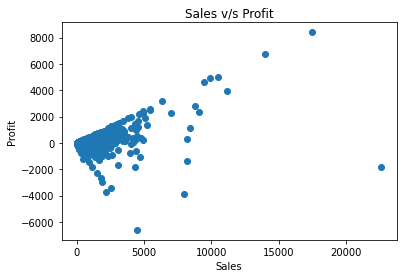

In [22]:
plt.scatter(data['Sales'],data['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

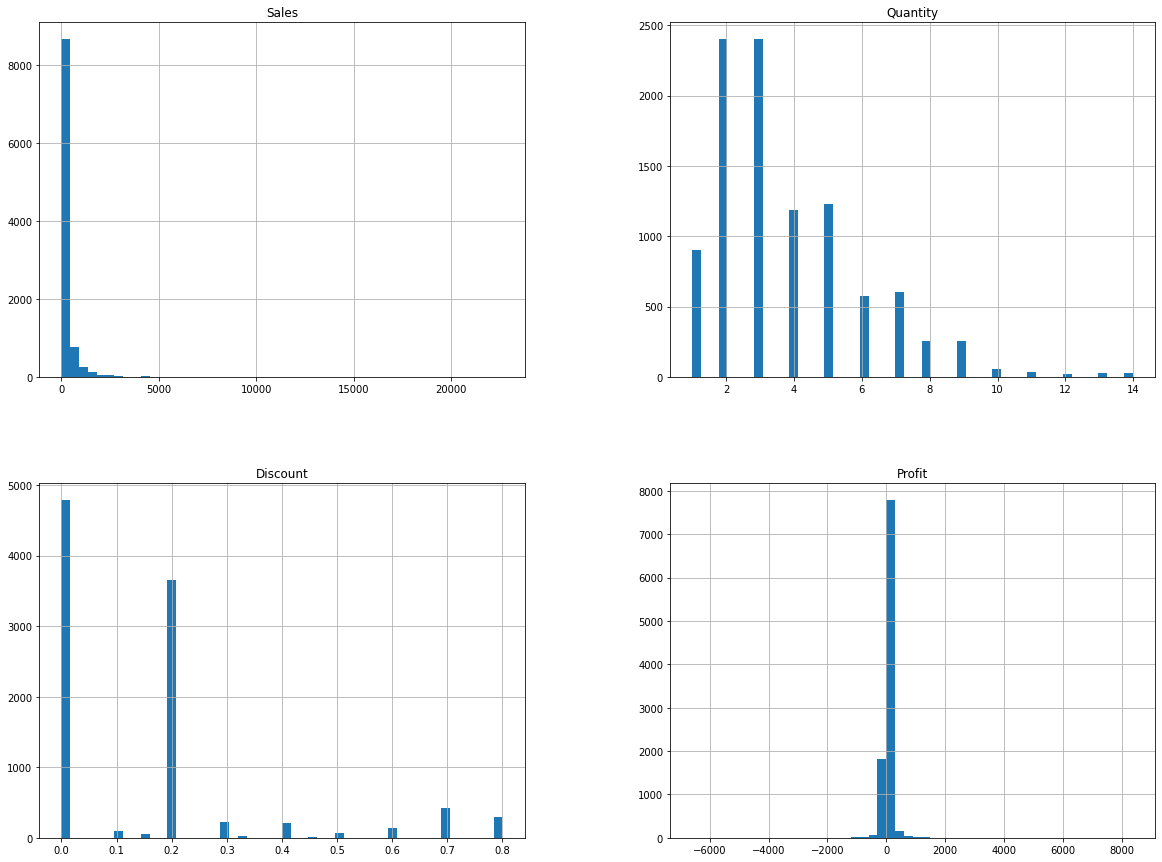

In [23]:
data.hist(bins=50, figsize=(20,15))
plt.show()

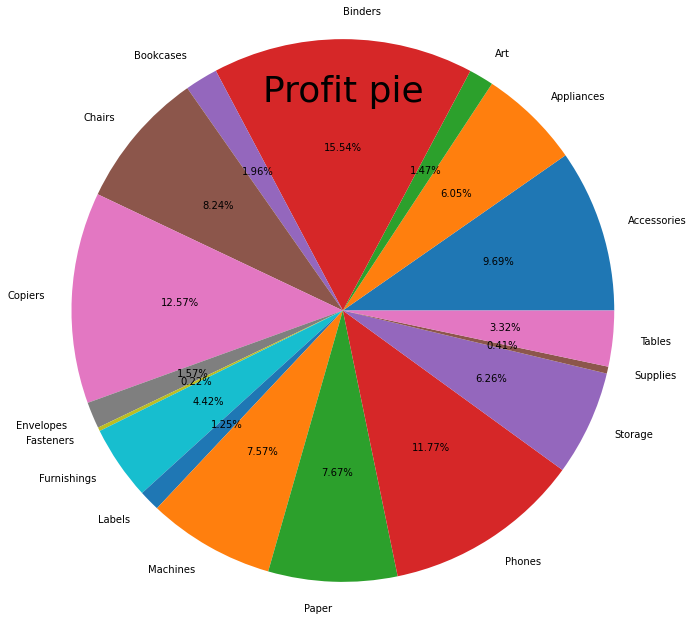

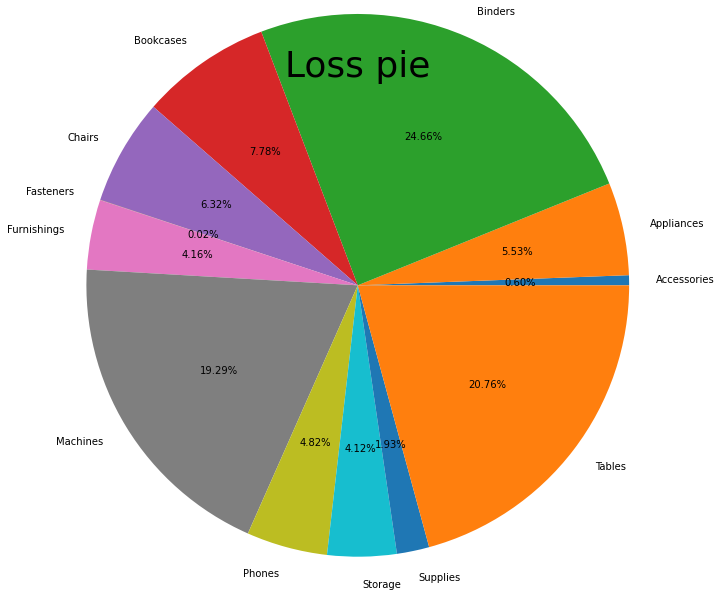

In [30]:
profit=data[data.Profit>0]
loss=data[data.Profit<0]

# percentage share of total profit by each sub-category
plt.pie(profit.groupby('Sub-Category').agg('sum').Profit,radius=3.12,labels=profit.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%')
plt.title('Profit pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()

# percentage share of total loss by each sub-category
plt.pie(np.abs(loss.groupby('Sub-Category').agg('sum').Profit),radius=3.12,labels=loss.groupby('Sub-Category').agg('sum').index,
       autopct='%1.2f%%')
plt.title('Loss pie',fontdict=dict(fontsize=36),pad=100,loc='center')
plt.show()

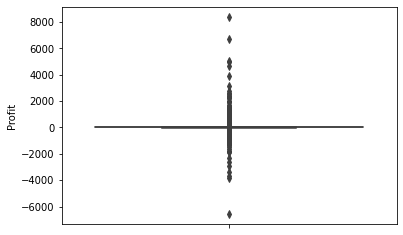

In [31]:
sns.boxplot(data = data  , y = 'Profit')

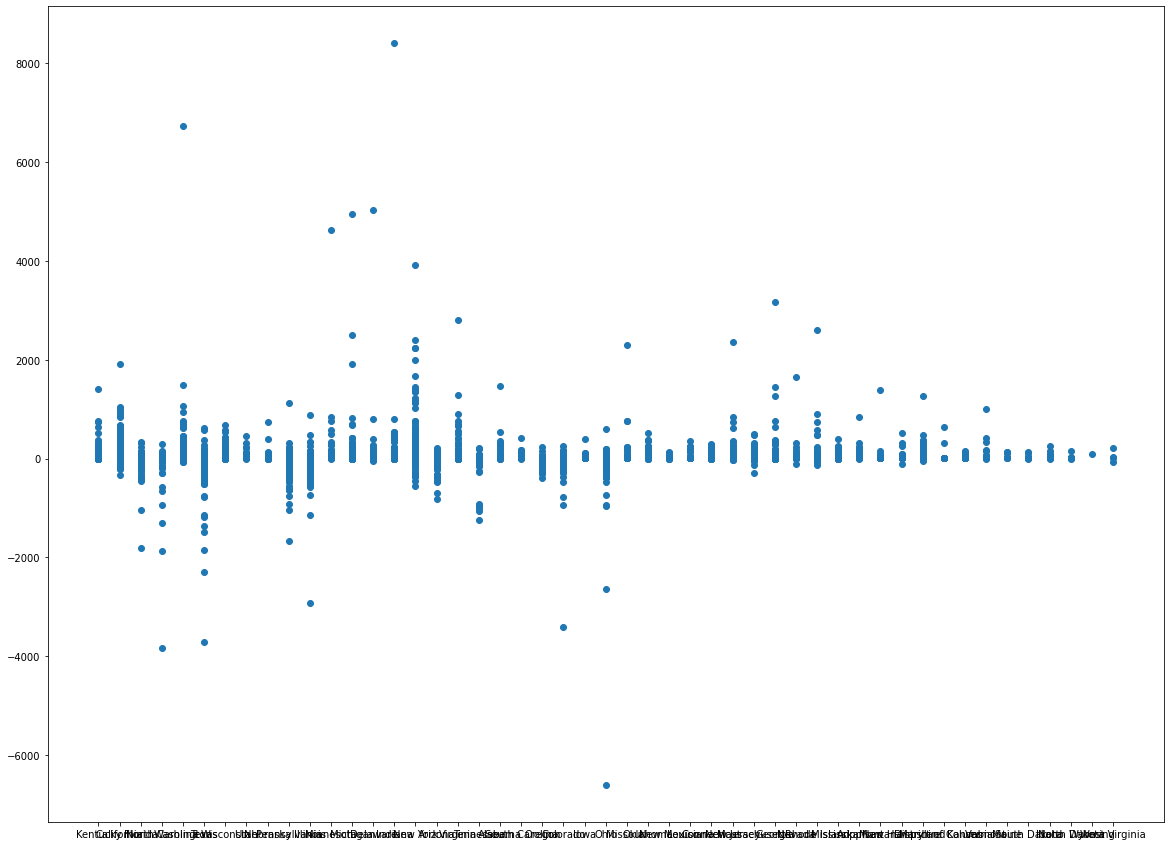

In [25]:
plt.figure(figsize=(20,15))
plt.scatter(data = data , x = 'State' ,  y = 'Profit')